In [1]:
from importlib import reload
import matplotlib.pyplot as plt
import cryptoz
from cryptoz import stats
import pandas as pd
import numpy as np

# data

In [2]:
from_dt = cryptoz.data.ago_dt(days=3)
to_dt = cryptoz.data.now_dt()
period = cryptoz.data.Period.M5

In [3]:
ohlc = cryptoz.data.chartdata('(USDT_+)', from_dt, to_dt, period)

   count         mean          std     min       25%         50%       75%  \
0  876.0  1106.646541  2744.262429  0.0616  16.77995  129.459822  532.5125   

       max  
0  11180.0  


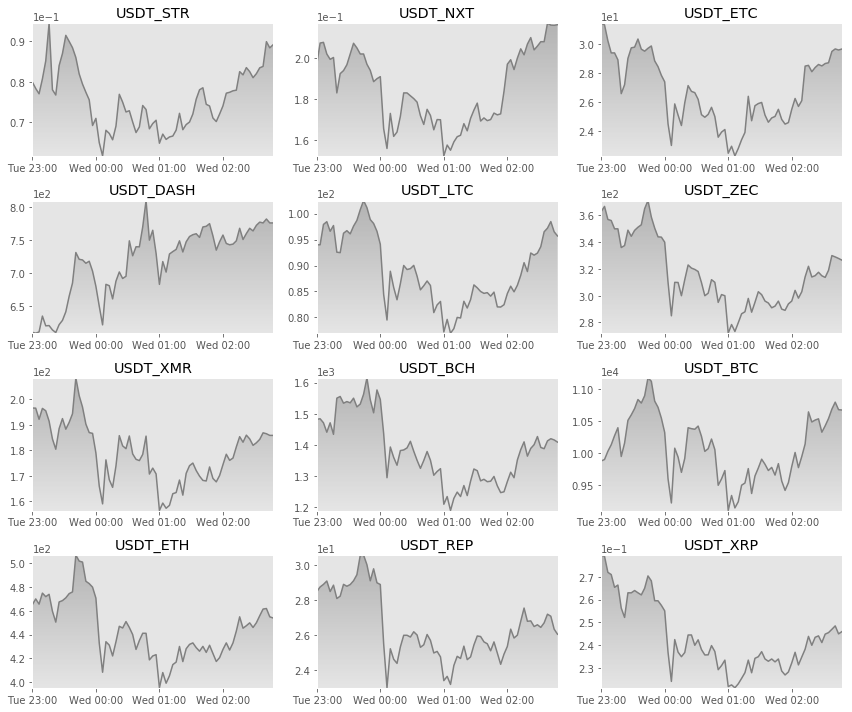

In [4]:
df = cryptoz.utils.to_df(ohlc, 'C').resample('1h').last()

cryptoz.plot.time_series(df, ranker=lambda sr: 1 - sr.iloc[-1] / sr.min())

# recovery

In [5]:
df = stats.recovery.dd(ohlc)

cryptoz.utils.describe_df(df)

,count,mean,std,min,25%,50%,75%,max
USDT_BCH,864.0,-0.149598,0.075985,-0.288750,-0.210465,-0.162230,-0.059915,-2.609241e-03
USDT_BTC,864.0,-0.105770,0.061150,-0.239982,-0.156264,-0.114854,-0.063300,-1.003814e-03
USDT_DASH,864.0,-0.068510,0.040321,-0.228218,-0.089433,-0.066568,-0.038572,-1.109990e-09
USDT_ETC,864.0,-0.165102,0.075210,-0.331763,-0.222688,-0.180146,-0.097768,-6.601728e-03
USDT_ETH,864.0,-0.124396,0.065361,-0.241715,-0.173430,-0.141611,-0.066162,-2.036660e-03
USDT_LTC,864.0,-0.129482,0.074684,-0.270356,-0.189249,-0.150628,-0.054989,-2.032108e-03
USDT_NXT,864.0,-0.163393,0.083936,-0.328855,-0.233636,-0.172971,-0.088601,-8.948439e-05
USDT_REP,864.0,-0.141631,0.076859,-0.277845,-0.195594,-0.169733,-0.060721,-3.356831e-10
USDT_STR,864.0,-0.224270,0.087118,-0.421910,-0.293618,-0.245023,-0.159816,-1.534917e-02
USDT_XMR,864.0,-0.136983,0.065963,-0.275971,-0.185648,-0.143581,-0.103118,-2.507523e-03


In [6]:
stats.recovery.dd_now(ohlc)

USDT_REP    -0.164783
USDT_BCH    -0.138215
USDT_ZEC    -0.129067
USDT_XRP    -0.126420
USDT_ETH    -0.115010
USDT_XMR    -0.108393
USDT_STR    -0.091900
USDT_LTC    -0.068975
USDT_ETC    -0.067274
USDT_BTC    -0.067274
USDT_DASH   -0.041846
USDT_NXT    -0.019792
dtype: float64

   count      mean       std      min       25%      50%       75%       max
0  876.0 -0.141131  0.078162 -0.35108 -0.196017 -0.15139 -0.072346 -0.003374


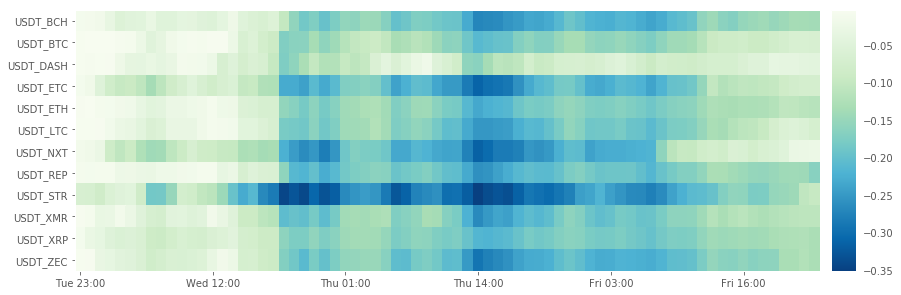

In [7]:
df = stats.recovery.resampled_dd(ohlc, '1h')

cryptoz.plot.evolution(df)

In [8]:
stats.recovery.maxdd_duration(ohlc)

USDT_BTC    0 days 05:25:00
USDT_LTC    0 days 05:30:00
USDT_XMR    0 days 06:40:00
USDT_DASH   0 days 07:05:00
USDT_STR    0 days 14:20:00
USDT_XRP    0 days 20:00:00
USDT_ETC    0 days 20:30:00
USDT_REP    0 days 23:40:00
USDT_BCH    0 days 23:45:00
USDT_ZEC    0 days 23:55:00
USDT_ETH    1 days 01:10:00
USDT_NXT    1 days 12:35:00
dtype: timedelta64[ns]

In [9]:
df = cryptoz.utils.to_df(stats.recovery.details(ohlc), 'dd_len')

cryptoz.utils.describe_df(df)

,count,mean,std,min,25%,50%,75%,max
USDT_BCH,4.0,88.750000,132.434575,5.0,11.00,32.5,110.25,285.0
USDT_BTC,15.0,7.200000,16.178469,1.0,1.00,3.0,4.50,65.0
USDT_DASH,14.0,14.500000,24.311283,1.0,1.25,2.5,14.25,85.0
USDT_ETC,1.0,246.000000,NaN,246.0,246.00,246.0,246.00,246.0
USDT_ETH,5.0,74.400000,128.083176,2.0,7.00,12.0,50.00,301.0
USDT_LTC,9.0,14.222222,24.247566,1.0,1.00,2.0,5.00,66.0
USDT_NXT,3.0,148.333333,251.726704,2.0,3.00,4.0,221.50,439.0
USDT_REP,11.0,31.272727,84.590887,1.0,1.50,2.0,4.00,284.0
USDT_STR,6.0,34.666667,67.884215,1.0,1.75,4.5,20.00,172.0
USDT_XMR,3.0,53.666667,45.610671,1.0,40.50,80.0,80.00,80.0


# corr

   count      mean       std       min       25%       50%      75%  max
0  144.0  0.684298  0.433404 -0.556407  0.719895  0.849744  0.92592  1.0


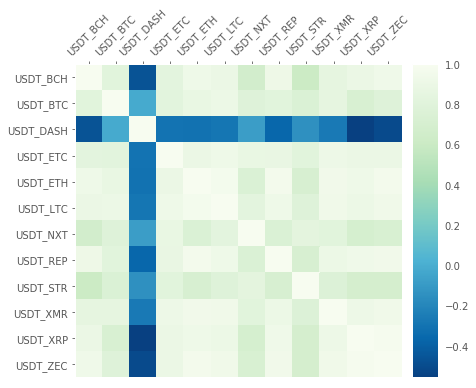

In [10]:
df = stats.corr.corr(cryptoz.utils.to_df(ohlc, 'C'))

cryptoz.plot.matrix(df)

   count      mean       std  min       25%       50%       75%  max
0  728.0  0.597599  0.402911 -1.0  0.472396  0.751001  0.883613  1.0


/Users/olegpolakow/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


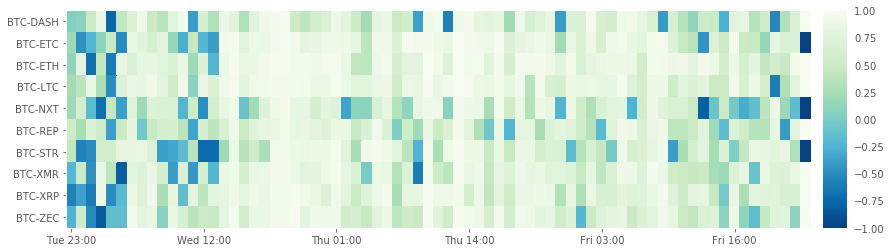

In [15]:
import re

df = cryptoz.utils.to_df(ohlc, 'C')
df = stats.corr.resampled_corr(df, '1h')
regex = re.compile('(USDT_BTC-+)')
df = df[list(filter(regex.search, df.columns))]
df.columns = list(map(lambda x: re.sub(r'(USDT_)', '', x), df.columns))

norm = cryptoz.plot.MidpointNormalize(midpoint=0.0)
cryptoz.plot.evolution(df, norm=norm)

# depth

In [12]:
orderbooks = cryptoz.data.orderbooks('(USDT_+)')

    count          mean            std           min           25%       50%  \
0  2400.0 -25466.412428  124439.387606 -409086.55598 -76783.612775  0.248531   

           75%            max  
0  42236.19178  244597.184805  


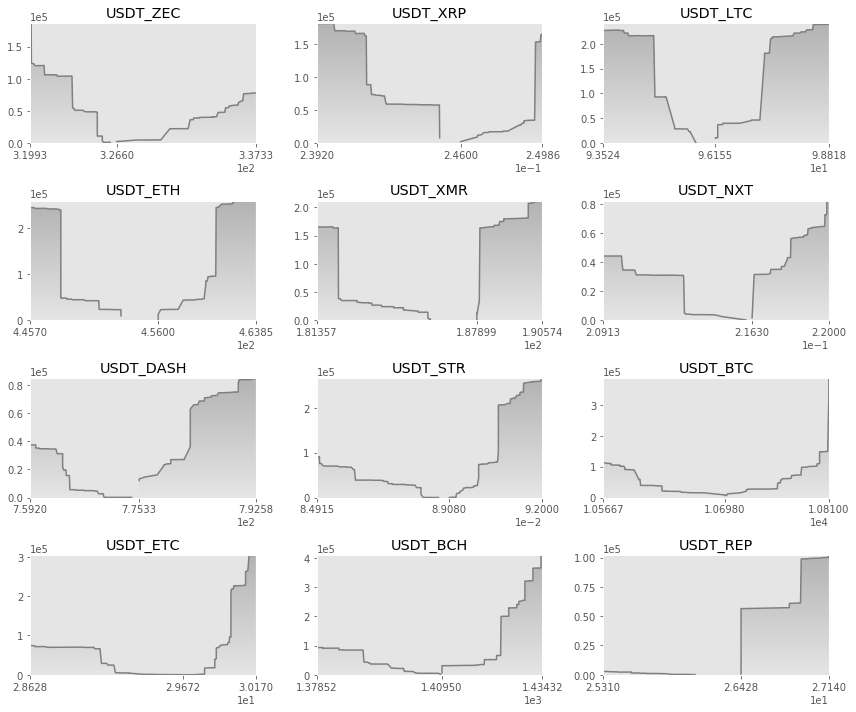

In [13]:
cryptoz.plot.depth(orderbooks, colors=('grey', 'grey'), ranker=lambda sr: 1 - sr.max() / abs(sr.min()))

# strategy

   count      mean       std   min  25%  50%  75%   max
0  876.0  0.107306  2.832447 -11.0  0.0  0.0  0.0  12.0


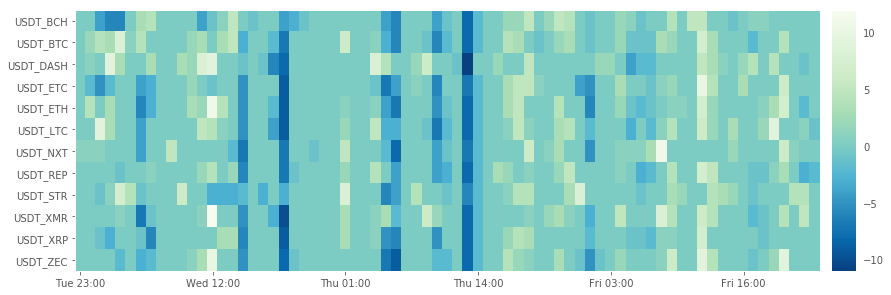

In [14]:
df = stats.strategy.apply(ohlc, lambda ohlc_df: stats.strategy.BB_crossover(ohlc_df, 36, 2))
df = df.resample('1h').sum()

norm = cryptoz.plot.MidpointNormalize(midpoint=0.0)
cryptoz.plot.evolution(df, norm=norm)